In [32]:
from pandas.io.json import json_normalize
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

In [2]:
def plot_steps(data):
    for runIdx in range(0, len(data)):
        fig, ax = plt.subplots()
        iteration = data.iloc[runIdx]["iteration"]
        clusters = data.iloc[runIdx]["clusters"]
        norm = colors.Normalize(vmin=0, vmax=len(clusters))
        print("iteration: %s, clusters: %s" % (iteration, len(clusters)))
        for cIdx in range(0, len(clusters)):
            rgba_color = cm.gnuplot(norm(cIdx))
            pointsX = [point[0] for point in clusters[cIdx]["points"]]
            pointsY = [point[1] for point in clusters[cIdx]["points"]]
            ax.scatter(pointsX, pointsY, color=rgba_color)
            ax.scatter(clusters[cIdx]["centroid"][0], clusters[cIdx]["centroid"][1], color=rgba_color, marker="+")

        plt.show()

In [3]:
def plot(data):
    for runIdx in range(0, len(data)):
        fig, ax = plt.subplots()
        clusters_step1 = data.iloc[runIdx]["steps"][0]["clusters"]
        clusters_step2 = data.iloc[runIdx]["steps"][1]["clusters"]
        norm = colors.Normalize(vmin=0, vmax=len(clusters_step1))
        for cIdx in range(0, len(clusters_step1)):
            rgba_color = cm.gnuplot(norm(cIdx))
            ax.plot(clusters_step1[cIdx]["syntheticCenter"], "--", color=rgba_color, label="cluster %s" % cIdx)
            ax.plot(clusters_step2[cIdx]["syntheticCenter"], color=rgba_color, label="cluster %s - rescheduled" % cIdx)
            print(clusters_step2[cIdx]["metric"])
        ax.legend(bbox_to_anchor=(1, -0.3), loc=4, borderaxespad=0.)

        ax.set(xlabel='Hours', ylabel='Power (kW)',title='')
        plt.show()

In [4]:
def plot_aggm(summary, file_name=None): 
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. agg m"], "--", color=rgba_color, label="s1. agg m")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. agg m"], color=rgba_color, label="s2. agg m")
    lgd = ax.legend(bbox_to_anchor=(1, -0.3), loc=4, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Aggregate PAR',title='')
    plt.show()
    if file_name is not None:
        fig.savefig(file_name, bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig
    
def plot_maxm(summary, file_name=None): 
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. max m"], "--", color=rgba_color, label="s1. max m")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. max m"], color=rgba_color, label="s2. max m")
    lgd = ax.legend(bbox_to_anchor=(1, -0.3), loc=4, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Max. Aggregate PAR',title='')
    plt.show()
    if file_name is not None:
        fig.savefig(file_name, bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig
    
def plot_peak(summary, file_name=None):
    fig, ax = plt.subplots()
    rgba_color = cm.gnuplot(norm(0))
    ax.plot(range(1, len(summary["s1. agg m"]) + 1), summary["s1. peak"], "--", color=rgba_color, label="s1. peak")
    ax.plot(range(1, len(summary["s2. agg m"]) + 1), summary["s2. peak"], color=rgba_color, label="s2. peak")
    lgd = ax.legend(bbox_to_anchor=(1, -0.3), loc=4, borderaxespad=0.)
    ax.set(xlabel='K clusters', ylabel='Peak power (kW)',title='')
    plt.show()
    if file_name is not None:
        fig.savefig(file_name, bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig

In [21]:
def crossfold_as_df(k, data):
    index_list = []
    step_list = []

    for i in range(0 , len(data)):
        register = data.iloc[i]

        crossfold = json_normalize(register["crossfold"])
        splits = crossfold["splits"].values[0]
        steps = data.iloc[i]["step"]
        for j in range(0, splits):
            step = json_normalize(steps[j])
            for ki in range(1, k+1):
                index_list.append((float("{0:.2f}".format(crossfold["sampleSize"].values[0])), j, ki))
                step_list.append(step.iloc[ki-1])


    json_normalize(data.iloc[0]["crossfold"])
    json_normalize(data.iloc[0]["step"][0])

    index = pd.MultiIndex.from_tuples(index_list, names=["sampleSize", "split", "k"])
    return pd.DataFrame(step_list, index=index)

# PAR Aggregate

In [41]:
summaryBatch_global = pd.read_json("./files/scheduler_tests/complete_2.9c/summaryBatch.json")

summary_batch_multiple_files = [ pd.read_json(f"./files/scheduler_tests/complete_v3.0/complete_v3.0_c{i}/summaryBatch.json") for i in range(1, 7)]

#summaryBatch_global = summaryBatch_global[["k","clusters","s1. agg m","s1. max m","s1. peak","s2. agg m","s2. max m","s2. peak","total m"]]
#batch_global = pd.read_json("./files/batch.json")

exp1_k = 6
exp1_sample_size_min = 0.5
exp1_sample_size_max = 1.0
exp1_nsteps = 2


def sample_size_range(sample_size_min, sample_size_max):
    return (x/10 for x in range(int(sample_size_min * 10), int((sample_size_max * 10) + 1)))
summaryBatch_global

,crossfold,step
0,"{'splits': 35, 'sampleSize': 0.5}","[[{'k': 1, 's1. peak': 1966513, 's1. agg m': 1..."
1,"{'splits': 35, 'sampleSize': 0.6000000000000001}","[[{'k': 1, 's1. peak': 2739769, 's1. agg m': 1..."
2,"{'splits': 35, 'sampleSize': 0.7000000000000001}","[[{'k': 1, 's1. peak': 2741654, 's1. agg m': 1..."
3,"{'splits': 35, 'sampleSize': 0.8}","[[{'k': 1, 's1. peak': 3014865, 's1. agg m': 1..."
4,"{'splits': 35, 'sampleSize': 0.9}","[[{'k': 1, 's1. peak': 3592763, 's1. agg m': 1..."
5,"{'splits': 35, 'sampleSize': 1}","[[{'k': 1, 's1. peak': 3903617, 's1. agg m': 1..."


In [67]:
#summary_batch_dfs = [ crossfold_as_df(exp1_k, summaryBatch_global) for i, b in enumerate(summary_batch_multiple_files)]
result = []
for f in glob.glob("./files/scheduler_tests/complete_v3.0/*/*.json"):
    with open(f, "r") as infile:
        result.append(json.load(infile))
        



        
#summaryBatch_global = pd.read_json("./files/scheduler_tests/complete_v3.0/merged_file.json")

#summaryBatch_global
result
r = []

for sampleSizeIdx, sampleSize in enumerate(sample_size_range(exp1_sample_size_min, exp1_sample_size_max)):
    steps = []
    for batch in result:
        #print(sampleSizeIdx)
        #print(batch[sampleSizeIdx]["crossfold"])
        #print(batch[sampleSizeIdx]["step"])
        steps.append(batch[sampleSizeIdx]["step"])
    flat_list = [item for sublist in steps for item in sublist]
    r.append({"crossfold": {"splits" : 200, "sampleSize": sampleSize}, "steps": flat_list})

    
r

with open("./files/scheduler_tests/complete_v3.0/merged_file.json", "w") as outfile:
     json.dump(r, outfile)

summaryBatch_global = pd.read_json("./files/scheduler_tests/complete_v3.0/merged_file.json")
summaryBatch_global

    
#exp1_treated = crossfold_as_df(exp1_k, summaryBatch_global)
#exp1_treated

,crossfold,steps
0,"{'splits': 200, 'sampleSize': 0.5}","[[{'k': 1, 's1. peak': 1916400, 's1. agg m': 1..."
1,"{'splits': 200, 'sampleSize': 0.6000000000000001}","[[{'k': 1, 's1. peak': 2267149, 's1. agg m': 1..."
2,"{'splits': 200, 'sampleSize': 0.7000000000000001}","[[{'k': 1, 's1. peak': 2792085, 's1. agg m': 1..."
3,"{'splits': 200, 'sampleSize': 0.8}","[[{'k': 1, 's1. peak': 3182832, 's1. agg m': 1..."
4,"{'splits': 200, 'sampleSize': 0.9}","[[{'k': 1, 's1. peak': 3580063, 's1. agg m': 1..."
5,"{'splits': 200, 'sampleSize': 1.0}","[[{'k': 1, 's1. peak': 3903617, 's1. agg m': 1..."


In [37]:
k2 = 2
query = f"k == {k2} and sampleSize == {exp1_sample_size_min}"
exp1_treated.query(query)["s1. agg m"].mean()
exp1_treated.query(query)["s1. max m"].mean()
exp1_treated.query(query)["s1. peak"].std()

257380.04181870824

In [38]:
def get_statistics(k, nSteps, treated, sample_size_min, sample_size_max):
    index_list = []
    step_list = []

    for j in range(1, k+1):
        for ssize in sample_size_range(sample_size_min, sample_size_max):

            index_list.append((ssize, "mean", j))
            query = f"k == {j} and sampleSize == {ssize}"
            index = ["s1. agg m","s1. max m","s1. peak", "s1. total m"]
            data = {key: treated.query(query)[key].mean() for key in index}
            data = {"s1. agg m" : treated.query(query)["s1. agg m"].mean(),
                    "s1. max m" : treated.query(query)["s1. max m"].mean(), 
                    "s1. peak" : treated.query(query)["s1. peak"].mean()/1000,
                   "s1. total m" : treated.query(query)["s1. total m"].mean()}
            index = ["s1. agg m","s1. max m","s1. peak", "s1. total m"]
            if (nSteps >= 2):
                data.update({"s2. agg m" : treated.query(query)["s2. agg m"].mean(),
                    "s2. max m" : treated.query(query)["s2. max m"].mean(), 
                    "s2. peak" : treated.query(query)["s2. peak"].mean()/1000,
                            "s2. total m" : treated.query(query)["s2. total m"].mean()})
                index = index + ["s2. agg m","s2. max m","s2. peak", "s2. total m"]

            s = pd.Series(data,index=index) 
            step_list.append(s)
            #print(f"sampleSize = {ssize}, k = {j}")

            index_list.append((ssize, "stdv", j))
            query = f"k == {j} and sampleSize == {ssize}"
            data = {"s1. agg m" : treated.query(query)["s1. agg m"].std(),
                    "s1. max m" : treated.query(query)["s1. max m"].std(), 
                    "s1. peak" : treated.query(query)["s1. peak"].std(),
                   "s1. total m" : treated.query(query)["s1. total m"].std()}
            index = ["s1. agg m","s1. max m","s1. peak", "s1. total m"]
            if (nSteps >= 2):
                data.update({"s2. agg m" : treated.query(query)["s2. agg m"].std(),
                    "s2. max m" : treated.query(query)["s2. max m"].std(), 
                    "s2. peak" : treated.query(query)["s2. peak"].std(),
                            "s2. total m" : treated.query(query)["s2. total m"].std()})
                index = index + ["s2. agg m","s2. max m","s2. peak", "s2. total m"]

            s = pd.Series(data,index=index) 
            step_list.append(s)


    index = pd.MultiIndex.from_tuples(index_list, names=["sampleSize", "metric", "k"])
    return pd.DataFrame(step_list, index=index)
exp1_statistics = get_statistics(exp1_k,exp1_nsteps, exp1_treated, exp1_sample_size_min, exp1_sample_size_max)
exp1_statistics

s1. agg m  s1. max m       s1. peak   s1. total m  \
sampleSize metric k                                                      
0.5        mean   1   1.451333   1.451333    2054.115086  1.451333e+00   
           stdv   1   0.105542   0.105542  219529.932726  1.055416e-01   
0.6        mean   1   1.458319   1.458319    2442.804057  1.458319e+00   
           stdv   1   0.079648   0.079648  156523.431118  7.964829e-02   
0.7        mean   1   1.437182   1.437182    2774.227971  1.437182e+00   
...                        ...        ...            ...           ...   
0.8        stdv   6   0.019236   0.079527  177631.300251  6.465417e-02   
0.9        mean   6   1.052730   1.670747     850.346771  1.420594e+00   
           stdv   6   0.017560   0.049149  167104.617720  4.660031e-02   
1.0        mean   6   1.049709   1.646332     937.467114  1.415407e+00   
           stdv   6   0.014711   0.036383  188203.761536  2.252863e-16   

                     s2. agg m  s2. max m       s2. peak  s2. total m  
sampleSize metric k                                                    
0.5        mean   1   1.408754   1.408754    1996.403829     1.408754  
           stdv   1   0.106269   0.106269  243253.650316     0.106269  
0.6        mean   1   1.405832   1.405832    2358.278971     1.405832  
           stdv   1   0.067848   0.067848  191818.213850     0.067848  
0.7        mean   1   1.365946   1.365946    2638.146800     1.365946  
...                        ...        ...            ...          ...  
0.8        stdv   6   0.035963   0.120483  175813.414841     0.051536  
0.9        mean   6   1.091089   1.662407     812.007600     1.358228  
           stdv   6   0.022118   0.068169  156878.898220     0.032369  
1.0        mean   6   1.081561   1.649961     906.462914     1.355375  
           stdv   6   0.035862   0.106011  171696.007547     0.020333  

[72 rows x 8 columns]

In [9]:
def get_metrics(k, metric, metric_type, statistics, sample_size_min, sample_size_max):

    index_list = [sample_size_range(sample_size_min, sample_size_max)]
    cols = [x for x in range(1, k+1)]
    step_list = []

    for ssize in sample_size_range(sample_size_min, sample_size_max):
        query = f"sampleSize == {ssize} and metric == \"{metric_type}\" "
        dataAllK = statistics.query(query)[f"{metric}"]
        dictAllK = {}
        for j in range(1, k+1):
            d = dataAllK.reset_index().query(f"k == {j}")[f"{metric}"]
            dictAllK[f"{j}"] = d.values[0]
        s = pd.Series(dictAllK, name=f"{ssize}")
        step_list.append(s)

    return pd.DataFrame(step_list)
    
mname = "s1. max m"
mtype = "stdv"
m = get_metrics(exp1_k, mname, mtype, exp1_statistics, exp1_sample_size_min, exp1_sample_size_max)

In [10]:
m

,1,2,3,4,5,6
0.5,1.055416e-01,0.099093,0.082305,0.134373,0.167176,0.142514
0.6,7.964829e-02,0.074174,0.077464,0.076603,0.116924,0.132754
0.7,7.910902e-02,0.071717,0.067812,0.066061,0.124628,0.123364
0.8,6.465417e-02,0.060297,0.055511,0.069090,0.061240,0.079527
0.9,4.660031e-02,0.045107,0.040691,0.049668,0.043439,0.049149
1.0,2.252863e-16,0.009116,0.018115,0.031673,0.039819,0.036383


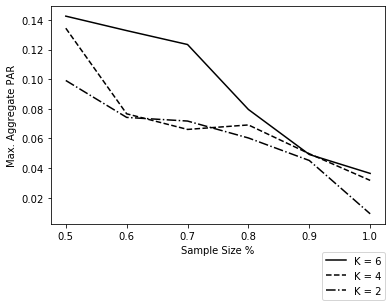

In [11]:
fig, ax = plt.subplots()

k2 = 6
sampleMaxMDataset = m[str(k2)]
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset.index.values))
values = sampleMaxMDataset.values
ax.plot(sampleSizes, values, "-", label=f"K = {k2}", c="black")

k2 = 4
sampleMaxMDataset = m[str(k2)]
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset.index.values))
values = sampleMaxMDataset.values
ax.plot(sampleSizes, values, "--", label=f"K = {k2}", c="black")

k2 = 2
sampleMaxMDataset = m[str(k2)]
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset.index.values))
values = sampleMaxMDataset.values
ax.plot(sampleSizes, values, "-.", label=f"K = {k2}", c="black")

lgd = ax.legend(bbox_to_anchor=(1, -0.35), loc=4, borderaxespad=0.)
ax.set(xlabel='Sample Size %', ylabel='Max. Aggregate PAR',title='')
plt.show()
file_name = "peakpower_samplesize.pdf"
if file_name is not None:
    fig.savefig(file_name, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [15]:
def show_summary2(k, summary_treated, statistics, sample_size):
    _list_clusters = {}
    _list_max_toal_m = {}
    _list_min_toal_m = {}
    _list_above_s1agg_m = {}
    _list_below_s1agg_m = {}
    rows_per_k = summary_treated.query(f"sampleSize == {sample_size} and k == 1").reset_index(drop=True).count().iloc[0]
    k1_s1_agg_m = statistics.query(f"sampleSize == {sample_size} and metric == \"mean\" and k == 1").reset_index().drop(["sampleSize", "metric"], axis=1)["s1. agg m"]
    for j in range(1, k+1):
        _list_clusters[j - 1] = str(summary_treated.query(f"sampleSize == {sample_size} and k == {j}").sort_values(by=["s1. max m", "s1. agg m"]).iloc[0]["clusters"])
        _list_max_toal_m[j - 1] = summary_treated.query(f"sampleSize == {sample_size} and k == {j}").sort_values(by=["s2TotalM"],ascending=False).iloc[0]["s2TotalM"]
        _list_min_toal_m[j - 1] = summary_treated.query(f"sampleSize == {sample_size} and k == {j}").sort_values(by=["s2TotalM"],ascending=True).iloc[0]["s2TotalM"]
        _list_above_s1agg_m[j - 1] = summary_treated.query(f"sampleSize == {sample_size} and s2TotalM >= {k1_s1_agg_m.values[0]} and k == {j}").reset_index(drop=True).count().iloc[0] / rows_per_k
        _list_below_s1agg_m[j - 1] = summary_treated.query(f"sampleSize == {sample_size} and s2TotalM < {k1_s1_agg_m.values[0]} and k == {j}").reset_index(drop=True).count().iloc[0] / rows_per_k
    a = statistics.query("sampleSize == 1.0 and metric == \"mean\"").reset_index().drop(["sampleSize", "metric"], axis=1)
    b = pd.DataFrame.from_dict(_list_clusters, orient="index", columns=["clusters"])
    c = pd.DataFrame.from_dict(_list_max_toal_m, orient="index", columns=["s2. total max m"])
    d = pd.DataFrame.from_dict(_list_min_toal_m, orient="index", columns=["s2. total min m"])
    e = pd.DataFrame.from_dict(_list_above_s1agg_m, orient="index", columns=["s2TotalAboveN"])
    f = pd.DataFrame.from_dict(_list_below_s1agg_m, orient="index", columns=["s2TotalBelowN"])
    r = pd.concat([a,b,c,d,e,f], axis=1, sort=False)
    r = r[["k", "s1. agg m", "s1. max m", "s1. peak", "s2AggM", "s2. max m", "s2. peak", "s2TotalM", "s2. total max m", "s2. total min m", "s2TotalBelowN"]]
    return r

r = show_summary2(exp1_k, exp1_treated, exp1_statistics, 1.0)
k1_s1_agg_m = exp1_statistics.query("sampleSize == 1.0 and metric == \"mean\" and k == 1").reset_index().drop(["sampleSize", "metric"], axis=1)["s1. agg m"]
exp1_treated.query(f"sampleSize == 1.0 and s2TotalM > {k1_s1_agg_m.values[0]} and k == 4").reset_index(drop=True).count().iloc[0]
#r1 = exp1_treated_copy.query("sampleSize == 1.0").reset_index().drop(["sampleSize", "metric"], axis=1)
#r1
r


,k,s1. agg m,s1. max m,s1. peak,s2AggM,s2. max m,s2. peak,s2TotalM,s2. total max m,s2. total min m,s2TotalBelowN
0,1,1.415407,1.415407,3903.617000,1.334687,1.334687,3680.996000,1.334687,1.334687,1.334687,1.000000
1,2,1.000747,1.419691,2336.783371,1.073778,1.570183,2210.722686,1.355514,1.485825,1.334687,0.914286
2,3,1.011281,1.454151,1617.025114,1.059471,1.516319,1545.682400,1.346684,1.397138,1.334687,1.000000
3,4,1.025664,1.519686,1251.971743,1.045293,1.492106,1200.635514,1.349026,1.401305,1.334687,1.000000
4,5,1.034901,1.584145,1107.798514,1.080675,1.632040,1062.847143,1.359678,1.436405,1.334687,0.914286
5,6,1.049709,1.646332,937.467114,1.081561,1.649961,906.462914,1.355375,1.418768,1.334687,0.971429


In [16]:
with open('summaryBatch.tex','w') as tf:
    tf.write(r.to_latex())

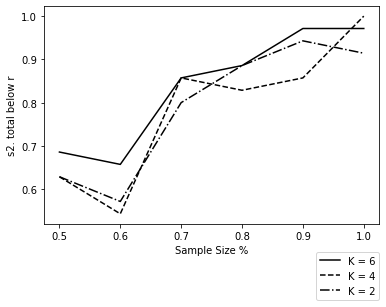

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [18]:
fig, ax = plt.subplots()

k2 = 6
sampleMaxMDataset = exp1_total_below_m.query(f"k == {k2}")
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset["sampleSize"].values))
values = sampleMaxMDataset["s2TotalBelowN"].values
ax.plot(sampleSizes, values, "-", label=f"K = {k2}", c="black")

k2 = 4
sampleMaxMDataset = exp1_total_below_m.query(f"k == {k2}")
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset["sampleSize"].values))
values = sampleMaxMDataset["s2TotalBelowN"].values
ax.plot(sampleSizes, values, "--", label=f"K = {k2}", c="black")

k2 = 2
sampleMaxMDataset = exp1_total_below_m.query(f"k == {k2}")
sampleSizes = list(map(lambda x: float(x), sampleMaxMDataset["sampleSize"].values))
values = sampleMaxMDataset["s2TotalBelowN"].values
ax.plot(sampleSizes, values, "-.", label=f"K = {k2}", c="black")

lgd = ax.legend(bbox_to_anchor=(1, -0.35), loc=4, borderaxespad=0.)
ax.set(xlabel='Sample Size %', ylabel='s2. total below r',title='')
plt.show()
file_name = "s2TotalBelowM_sampleSize"
if file_name is not None:
    fig.savefig(f"{file_name}.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight', format="pdf", dpi=1200)
    fig.savefig(f"{file_name}.eps", bbox_extra_artists=(lgd,), bbox_inches='tight', format="eps", dpi=1200)